<a href="https://colab.research.google.com/github/Sanvika25/training-the-Neural-Network-on-labeled-training-data-of-Churn-Modeling-dataset/blob/main/ann_week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

In [ ]:
#read the dataset
dataset = pd.read_csv("CM.csv")
dataset.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,42,2,0.00,1,1,1,101348.88,1
1,608,41,1,83807.86,1,0,1,112542.58,0
2,502,42,8,159660.80,3,1,0,113931.57,1
3,699,39,1,0.00,2,0,0,93826.63,0
4,850,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
#separate X and target
X = dataset.iloc[:,:8].values
y = dataset.iloc[:,-1].values

In [ ]:
print(X)

[[6.1900000e+02 4.2000000e+01 2.0000000e+00 ... 1.0000000e+00
  1.0000000e+00 1.0134888e+05]
 [6.0800000e+02 4.1000000e+01 1.0000000e+00 ... 0.0000000e+00
  1.0000000e+00 1.1254258e+05]
 [5.0200000e+02 4.2000000e+01 8.0000000e+00 ... 1.0000000e+00
  0.0000000e+00 1.1393157e+05]
 ...
 [8.1100000e+02 4.4000000e+01 3.0000000e+00 ... 0.0000000e+00
  1.0000000e+00 7.8439730e+04]
 [5.8700000e+02 6.2000000e+01 7.0000000e+00 ... 0.0000000e+00
  1.0000000e+00 6.7769200e+03]
 [8.1100000e+02 2.8000000e+01 4.0000000e+00 ... 1.0000000e+00
  1.0000000e+00 9.9034200e+03]]


In [ ]:
print(y[0:5])

[1 0 1 0 0]


In [ ]:
# for our validation, convert X and y to dataframe and check the columns
df = pd.DataFrame(X)
df.head()

# observe X has 0 to 7 columns , so total of 8  columns in X

,0,1,2,3,4,5,6,7
0,619.0,42.0,2.0,0.00,1.0,1.0,1.0,101348.88
1,608.0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58
2,502.0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57
3,699.0,39.0,1.0,0.00,2.0,0.0,0.0,93826.63
4,850.0,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10


In [ ]:
df=pd.DataFrame(y)
df.head()
# y has only target

,0
0,1
1,0
2,1
3,0
4,0


In [ ]:
# apply train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [ ]:
#build your keras ANN model
import keras
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
# Defining the ANN model
model = Sequential()
# Adding the first hidden layer, by passing X with 8 features
model.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu', input_dim = 8))

# Adding the second hidden layer
model.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 36        
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 61
Trainable params: 61
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Fitting the ANN to the Training set
model.fit(X_train, y_train, batch_size = 2, epochs = 5)

Epoch 1/5
400/400 [==============================] - 2s 2ms/step - loss: 0.6588 - accuracy: 0.7672
Epoch 2/5
400/400 [==============================] - 1s 2ms/step - loss: 0.5506 - accuracy: 0.7997
Epoch 3/5
400/400 [==============================] - 1s 2ms/step - loss: 0.5418 - accuracy: 0.7997
Epoch 4/5
400/400 [==============================] - 1s 2ms/step - loss: 0.5402 - accuracy: 0.7997
Epoch 5/5
400/400 [==============================] - 1s 2ms/step - loss: 0.5368 - accuracy: 0.7997


In [ ]:
y_pred = model.predict(X_test)

7/7 [==============================] - 0s 2ms/step


In [ ]:
print(y_pred[10:20])

[[0.17634942]
 [0.2797943 ]
 [0.2324742 ]
 [0.21633515]
 [0.34753293]
 [0.3546687 ]
 [0.11454824]
 [0.36385548]
 [0.3488438 ]
 [0.31122902]]


In [ ]:
print(y_test[10:20])

[0 0 0 0 0 0 1 0 0 0]


In [ ]:
# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss='binary_crossentropy',
              metrics=['accuracy'])

Epoch 1/100 - Test Loss: 0.5609 - Test Accuracy: 0.7800
Epoch 2/100 - Test Loss: 0.5453 - Test Accuracy: 0.7800
Epoch 3/100 - Test Loss: 0.5671 - Test Accuracy: 0.7800
Epoch 4/100 - Test Loss: 0.5441 - Test Accuracy: 0.7800
Epoch 5/100 - Test Loss: 0.5365 - Test Accuracy: 0.7800
Epoch 6/100 - Test Loss: 0.5369 - Test Accuracy: 0.7800
Epoch 7/100 - Test Loss: 0.5420 - Test Accuracy: 0.7800
Epoch 8/100 - Test Loss: 0.5341 - Test Accuracy: 0.7800
Epoch 9/100 - Test Loss: 0.5304 - Test Accuracy: 0.7800
Epoch 10/100 - Test Loss: 0.5282 - Test Accuracy: 0.7800
Epoch 11/100 - Test Loss: 0.5378 - Test Accuracy: 0.7800
Epoch 12/100 - Test Loss: 0.5309 - Test Accuracy: 0.7800
Epoch 13/100 - Test Loss: 0.5398 - Test Accuracy: 0.7800
Epoch 14/100 - Test Loss: 0.5293 - Test Accuracy: 0.7800
Epoch 15/100 - Test Loss: 0.5318 - Test Accuracy: 0.7800
Epoch 16/100 - Test Loss: 0.5298 - Test Accuracy: 0.7800
Epoch 17/100 - Test Loss: 0.5286 - Test Accuracy: 0.7800
Epoch 18/100 - Test Loss: 0.5358 - Test 

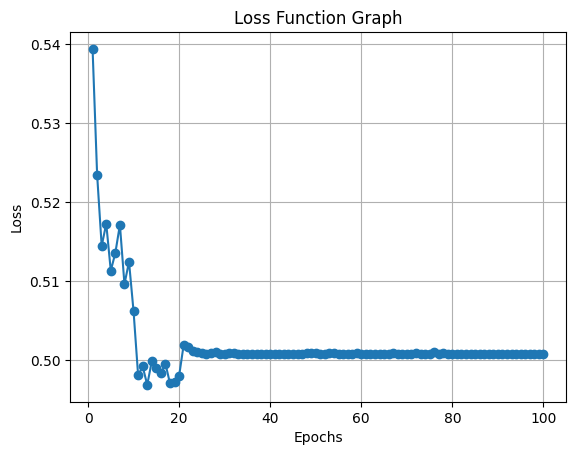

In [ ]:
#training the model
num_epochs = 100
loss_history = []

for epoch in range(num_epochs):
    history = model.fit(X_train, y_train, batch_size=64, epochs=1, verbose=0)
    loss_history.append(history.history['loss'][0])

    # Evaluate the model on the test set
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
    print(f"Epoch {epoch+1}/{num_epochs} - Test Loss: {test_loss:.4f} - Test Accuracy: {test_acc:.4f}")

# Plot the loss function graph
plt.plot(range(1, num_epochs+1), loss_history, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Function Graph')
plt.grid(True)
plt.show()